A first look around the data in the what's cooking challenge. The challenge is to predict the cuisine based on the incoming list of ingredients provided.

In [82]:
# Modules
import json
from pprint import pprint
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import csv

In [3]:
with open('../data/train.json') as data_file:    
    data = json.load(data_file)

pprint(data[0])
print len(data)

{u'cuisine': u'greek',
 u'id': 10259,
 u'ingredients': [u'romaine lettuce',
                  u'black olives',
                  u'grape tomatoes',
                  u'garlic',
                  u'pepper',
                  u'purple onion',
                  u'seasoning',
                  u'garbanzo beans',
                  u'feta cheese crumbles']}
39774


As can be seen, each recipe comes as a dictionary with fields for cuisine, an id, and a list of ingredients. There are 39,774 recipes in total. A first and most simple approach would be to calculate the number of times each ingredient appears in each cuisine. At the same time it is useful to perform a count of all the unique cuisines and ingredients that appear, just so I can visually check whether there is any cleaning to be done and the scale of the problem.

For now I will look through each recipe, create 2 dictionaries, cuisines and ingredients. The first has a dictionary for each value, with a count of ingredients, the second is a pure count of ingredients.

In [8]:
# Empties
cuisines = {}
ingredients = {}

for recipe in data:
    # The cuisine counter
    if recipe['cuisine'] in cuisines:
        cuisines[recipe['cuisine']] += 1
    else:
        cuisines[recipe['cuisine']] = 1
    # The indivual ingedient counter
    for ingredient in recipe['ingredients']:
        if ingredient in ingredients:
            ingredients[ingredient] += 1
        else:
            ingredients[ingredient] = 1

In [13]:
print(cuisines)
print "Number of unique ingredients is: ", len(ingredients)

{u'irish': 667, u'mexican': 6438, u'chinese': 2673, u'filipino': 755, u'vietnamese': 825, u'moroccan': 821, u'brazilian': 467, u'japanese': 1423, u'british': 804, u'greek': 1175, u'indian': 3003, u'jamaican': 526, u'french': 2646, u'spanish': 989, u'russian': 489, u'cajun_creole': 1546, u'thai': 1539, u'southern_us': 4320, u'korean': 830, u'italian': 7838}
Number of unique ingredients is:  6714


In [17]:
print cuisines.values()

[667, 6438, 2673, 755, 825, 821, 467, 1423, 804, 1175, 3003, 526, 2646, 989, 489, 1546, 1539, 4320, 830, 7838]


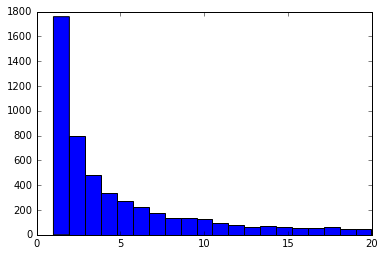

In [24]:
plt.hist(ingredients.values(),bins = 20,range = (1,20))
plt.show()

In [27]:
# Which ingedients are super common
cut_off_count = 7000
common_ing = []

for name, count in ingredients.iteritems():
    if count >= cut_off_count:
        common_ing.append(name)

print common_ing

[u'salt', u'olive oil', u'garlic', u'water', u'onions']


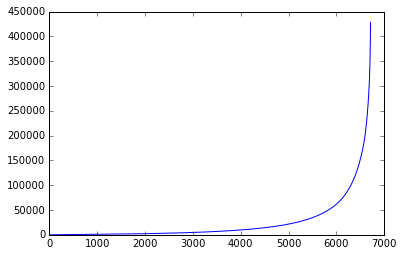

In [32]:
# How much can the ingredients list be simplified
plt.plot(range(len(ingredients)),np.cumsum(sorted(ingredients.values())))
plt.show()

In [39]:
# Create a new list of ingredients which appear at least more than 100 times to simplify matters. This bit of code
# is used to check how many ingredients we'll have if only the most common ones are counted
common_counts = [x for x in ingredients.values() if x > 100]
len(common_counts)

640

In [41]:
count_cutoff = 100
common_igs = {key: value for key, value in ingredients.iteritems() if value >= count_cutoff}

In [42]:
print common_igs

{u'red cabbage': 134, u'dijon mustard': 513, u'yellow corn meal': 341, u'sweet potatoes': 455, u'ground cardamom': 237, u'mascarpone': 149, u'milk': 2263, u'Italian bread': 118, u'palm sugar': 122, u'minced onion': 189, u'grated orange': 149, u'onion powder': 528, u'pork shoulder': 135, u'ginger paste': 119, u'cayenne pepper': 1523, u'pancetta': 177, u'vegetable broth': 409, u'mozzarella cheese': 467, u'couscous': 189, u'sugar pea': 104, u'white bread': 130, u'frozen corn kernels': 124, u'melted butter': 276, u'self rising flour': 193, u'turnips': 113, u'vanilla extract': 1298, u'yeast': 109, u'lard': 157, u'garlic salt': 240, u'marinara sauce': 229, u'boiling water': 350, u'jack cheese': 118, u'curry paste': 106, u'peaches': 263, u'tortillas': 222, u'asparagus': 230, u'jalapeno chilies': 1730, u'red chili powder': 220, u'prosciutto': 284, u'green pepper': 373, u'saffron threads': 277, u'hot red pepper flakes': 171, u'vanilla': 311, u'pork': 300, u'penne pasta': 178, u'dried porcini mu

In [43]:
# Create the empty dictionaries
ing_per_cuisine = {}

# The ingredient counts for each cuisine
for key in cuisines:
    ing_per_cuisine[key] = {ikey: 0 for ikey in common_igs}
    
# Loop through each recipe, and add the top cuisines to the relevant dictionary
for recipe in data:
    for ingredient in recipe['ingredients']:
        if ingredient in common_igs:
            ing_per_cuisine[recipe['cuisine']][ingredient] += 1

In [46]:
ing_per_cuisine['italian']

{u'1% low-fat milk': 68,
 u'Gochujang base': 0,
 u'Italian bread': 89,
 u'Italian parsley leaves': 74,
 u'Mexican cheese blend': 0,
 u'Mexican oregano': 1,
 u'Shaoxing wine': 0,
 u'Sriracha': 0,
 u'Tabasco Pepper Sauce': 3,
 u'Thai fish sauce': 0,
 u'Thai red curry paste': 0,
 u'active dry yeast': 128,
 u'all purpose unbleached flour': 68,
 u'all-purpose flour': 918,
 u'allspice': 4,
 u'almond extract': 56,
 u'almonds': 35,
 u'ancho chile pepper': 1,
 u'anchovy fillets': 124,
 u'andouille sausage': 1,
 u'apple cider vinegar': 7,
 u'apples': 6,
 u'arborio rice': 261,
 u'artichoke hearts': 99,
 u'arugula': 125,
 u'asian fish sauce': 0,
 u'asparagus': 123,
 u'avocado': 25,
 u'baby spinach': 117,
 u'baby spinach leaves': 39,
 u'bacon': 124,
 u'bacon slices': 48,
 u'baguette': 119,
 u'baking potatoes': 34,
 u'baking powder': 186,
 u'baking soda': 68,
 u'balsamic vinegar': 348,
 u'bamboo shoots': 0,
 u'bananas': 6,
 u'barbecue sauce': 9,
 u'basil': 174,
 u'basil leaves': 153,
 u'basmati rice

In [56]:
# Now find the percentage of all occurances of each which occur in each cuisine
ing_cuisine_ratio = ing_per_cuisine
for cuisine in ing_per_cuisine:
    for ingredient in ing_per_cuisine[cuisine]:
        ing_cuisine_ratio[cuisine][ingredient] = \
        ing_per_cuisine[cuisine][ingredient]/\
        float(common_igs[ingredient])

In [68]:
# A quick check that the sum of any sample of these is 1
ingredient = 'yeast'
tot = 0
for cuisine in ing_cuisine_ratio:
    tot += ing_cuisine_ratio[cuisine][ingredient]
print tot
if abs(tot-1) <= 1e-15:
    print "Success, the sum across all cuisines is 1"

1.0
Success, the sum across all cuisines is 1


In [72]:
# Now estimate the performance on the training set, by looping through 
# all recipes and seeing which one has the highest likelihood. This 
# could be faster using arrays
scores = [] # List to count results

for recipe in data:
    cui_temp = {key: 0 for key in cuisines}
    # Check against all cuisines
    for cuisine in cui_temp:
        for ingredient in recipe['ingredients']:
            if ingredient in common_igs:
                cui_temp[cuisine] += ing_cuisine_ratio[cuisine][ingredient]
    v=list(cui_temp.values())
    k=list(cui_temp.keys())
    cuisine_guess = k[v.index(max(v))]
    if cuisine_guess == recipe['cuisine']:
        scores.append(1)
    else:
        scores.append(0)
                

In [73]:
# Estimate the expected result
print(sum(scores)/float(len(scores)))

0.566525871172


This result has one very significant fault, where the ingredients are actually slightly biased according to the popularity of each cuisine. This can be remedied by using a slightly different version, which measures the likelihood of each ingredient within each cuisine.

In [74]:
# Find what ratio of each cuisine contained which ingredients
ing_internal_ratios = ing_cuisine_ratio
for cuisine in cuisines:
    for ingredient in ing_internal_ratios[cuisine]:
        ing_internal_ratios[cuisine][ingredient] = \
        ing_internal_ratios[cuisine][ingredient] / float(cuisines[cuisine])

In [75]:
# Now estimate the performance on the training set, by looping through 
# all recipes and seeing which one has the highest likelihood. This 
# could be faster using arrays
scores = [] # List to count results

for recipe in data:
    cui_temp = {key: 0 for key in cuisines}
    # Check against all cuisines
    for cuisine in cui_temp:
        for ingredient in recipe['ingredients']:
            if ingredient in common_igs:
                cui_temp[cuisine] += ing_internal_ratios[cuisine][ingredient]
    v=list(cui_temp.values())
    k=list(cui_temp.keys())
    cuisine_guess = k[v.index(max(v))]
    if cuisine_guess == recipe['cuisine']:
        scores.append(1)
    else:
        scores.append(0)

# Estimate the expected result
print(sum(scores)/float(len(scores)))

0.582792779202


In [76]:
# Lets test this on the public leaderboard, and see how it does, and 
# have a nice chance to practice outputting to csv

0.56650072912


In [77]:
# Lets test this on the public leaderboard, and see how it does
with open('../data/test.json') as data_file:    
    test_data = json.load(data_file)

pprint(test_data[0])
print len(test_data)

{u'id': 18009,
 u'ingredients': [u'baking powder',
                  u'eggs',
                  u'all-purpose flour',
                  u'raisins',
                  u'milk',
                  u'white sugar']}
9944


In [79]:
ids = [] # Store of recipe ids
cuisine_guesses = [] # store of guessed cuisines

for recipe in test_data:
    ids.append(recipe['id'])
    cui_temp = {key: 0 for key in cuisines}
    # Check against all cuisines
    for cuisine in cui_temp:
        for ingredient in recipe['ingredients']:
            if ingredient in common_igs:
                cui_temp[cuisine] += ing_internal_ratios[cuisine][ingredient]
    v=list(cui_temp.values())
    k=list(cui_temp.keys())
    cuisine_guesses.append(k[v.index(max(v))])

In [81]:
print cuisine_guesses[:10]

[u'british', u'british', u'moroccan', u'cajun_creole', u'italian', u'british', u'spanish', u'chinese', u'mexican', u'moroccan']


In [85]:
with open('../results/init_submission.csv','w') as csvfile:
    writer = csv.writer(csvfile, delimiter = ',')
    writer.writerow(['id','cuisine'])
    for i in range(len(ids)):
        writer.writerow([ids[i],cuisine_guesses[i]])

This was successfully submitted, and scored 0.56798, pretty close to the score on the training data, 0.58279. The next step will be to use a better model, initially a random forest implemented using sci-kit learn.